<a href="https://colab.research.google.com/github/Todayis0613/YelpProject_Beauty-Salon-Recommendation/blob/main/4_KMeans_BizGrow006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Load the check-in data into a DataFrame
file_path = "/content/drive/My Drive/ASU/509/Project Data/checkins_data1.csv"
checkins_df = pd.read_csv(file_path)

# Print confirmation
print("\nCheck-in Data Loaded Successfully")

# Display dataset shape (rows, columns)
print(f"Shape: {checkins_df.shape}")

# Check for missing values
print("\nChecking Missing Values in Check-in Data:")
print(checkins_df.isnull().sum())

# Display a sample of the data
print("\nSample Check-in Data:")
checkins_df.head(3)



Check-in Data Loaded Successfully
Shape: (9782, 3)

Checking Missing Values in Check-in Data:
business_id    0
date           0
year           0
dtype: int64

Sample Check-in Data:


,business_id,date,year
0,I3bujTHGk2scZfz4mMNq3w,2022-01-19 10:54:16,2022
1,ndVkAn-YN-Yb-C1lMwjkeg,2022-01-19 02:01:59,2022
2,ndVkAn-YN-Yb-C1lMwjkeg,2022-01-19 01:46:35,2022


In [3]:
import pandas as pd

# Load topic modeling results
file_path = "/content/drive/My Drive/ASU/509/Project Data/topic_modeling.csv"
reviews_df = pd.read_csv(file_path)

# Check the dataset
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,tokens,review_length,sentiment_score,sentiment_category,Topic,name
0,S9VRIhPFn9Sl_yQgQWSjWg,mV6SGJKgJT1d6GeC5TdOHQ,I3bujTHGk2scZfz4mMNq3w,2,0,0,0,Fix the ladies bathroom sinks. They do not sta...,2022-01-19 17:46:47,2022,"['fix', 'the', 'ladies', 'bathroom', 'sinks', ...",77,0.7992,Positive,0,Chuze Fitness
1,LEZNilOu2qnvPcKBze7sZg,qThG1M8CoFsyl-gkSek2ZQ,eMUXEPKllxw6FhWVoxkKXQ,5,0,0,0,I can't speak highly enough of this salon Go s...,2022-01-19 12:13:51,2022,"['i', 'ca', ""n't"", 'speak', 'highly', 'enough'...",37,0.8874,Positive,0,Mauricio Fregoso Salon
2,toFQ61E8RqlLj_76QrdfDQ,CcvNlfou5b99umxnd1zChg,jAmnB-jWh-ApQ27E3057Aw,5,0,0,0,I cannot speak higher about Tyler at Grape Ape...,2022-01-19 05:41:58,2022,"['i', 'can', 'not', 'speak', 'higher', 'about'...",184,0.9936,Positive,2,Grape Ape Tattoo
3,cfcDG_hHm8vIwGX27s4_7Q,-V37fpiyG4HmtjXLvSWV0w,WqL6qsaK2UKQKJph4XaMJA,5,0,0,0,I have been coming here since they opened. I ...,2022-01-19 05:04:50,2022,"['i', 'have', 'been', 'coming', 'here', 'since...",76,0.6987,Positive,0,Amazing Lash Studio
4,Clq6eb5NzJm1otz6nXdZ6Q,Hxfwej6Sli5yxfLmpGgkfQ,isl76zjJElJ-AYq4Mry2sQ,5,0,0,0,Thank you Angela!!! This was my first lash ext...,2022-01-19 02:07:03,2022,"['thank', 'you', 'angela', 'this', 'was', 'my'...",91,0.9672,Positive,0,Wink Lashes Tucson


### Analyze Trends Over Time

In [4]:
import warnings
warnings.filterwarnings('ignore')

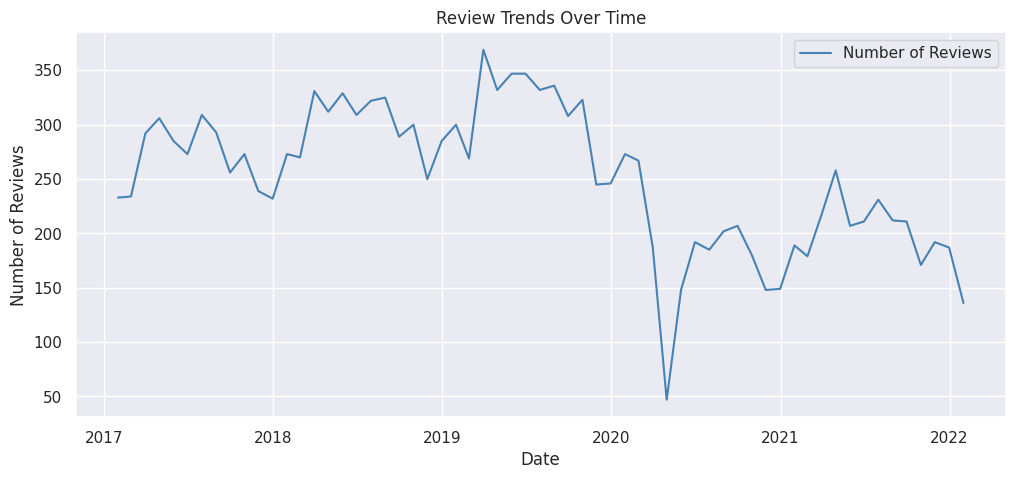

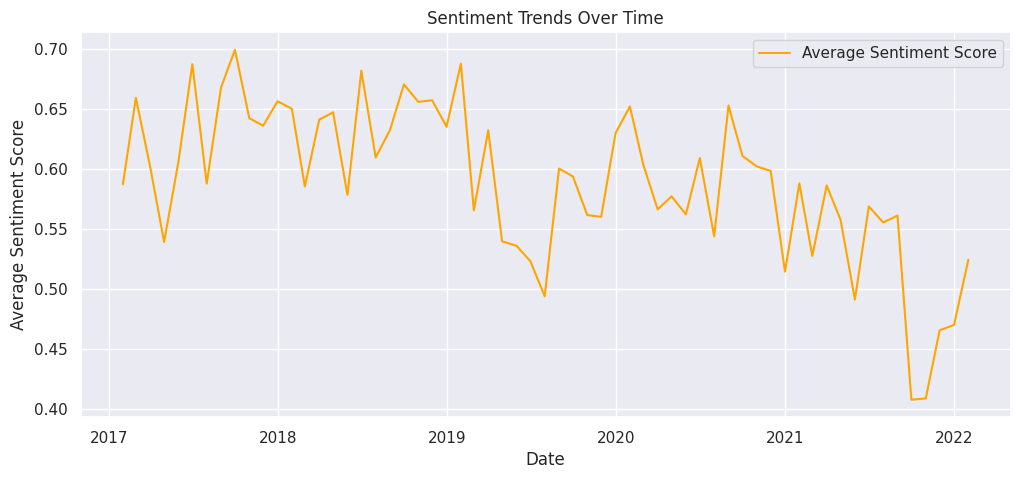

In [5]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Convert date column to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Group by month and count reviews
monthly_reviews = reviews_df.resample('M', on='date').count()

# Group by month and calculate average sentiment score
monthly_sentiment = reviews_df.resample('M', on='date')['sentiment_score'].mean()

# Plot trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_reviews.index, monthly_reviews['review_id'], label="Number of Reviews", color='steelblue')
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.title("Review Trends Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(monthly_sentiment.index, monthly_sentiment, label="Average Sentiment Score", color='orange')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.legend()
plt.show()


## Analyze Seasonal Trends in Check-ins

In [6]:
checkins_df.info()
checkins_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9782 entries, 0 to 9781
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  9782 non-null   object
 1   date         9782 non-null   object
 2   year         9782 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 229.4+ KB


,business_id,date,year
0,I3bujTHGk2scZfz4mMNq3w,2022-01-19 10:54:16,2022
1,ndVkAn-YN-Yb-C1lMwjkeg,2022-01-19 02:01:59,2022
2,ndVkAn-YN-Yb-C1lMwjkeg,2022-01-19 01:46:35,2022
3,yTUNsOl2hZacHmVLBthdfg,2022-01-19 01:06:00,2022
4,yIpY7a9pd35hZhMuKEGEeg,2022-01-18 21:39:57,2022


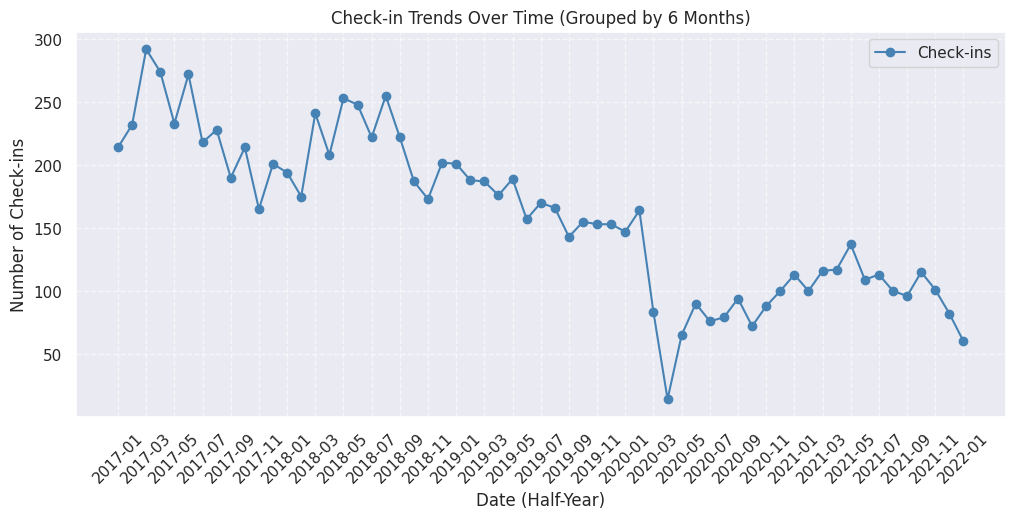

In [7]:
sns.set_theme(style="darkgrid")

# Convert the 'date' column to datetime format
checkins_df['date'] = pd.to_datetime(checkins_df['date'])

# Create a half-year period column (H1 = Jan-Jun, H2 = Jul-Dec)
checkins_df['half_year'] = checkins_df['date'].dt.to_period('6M')

# Group check-ins by half-year
half_yearly_checkins = checkins_df.groupby('half_year').size()

# Convert PeriodIndex to string for plotting
x_labels = half_yearly_checkins.index.astype(str)

# Plot check-in trends over time
plt.figure(figsize=(12, 5))
plt.plot(x_labels, half_yearly_checkins, marker='o', linestyle='-', color='steelblue', label="Check-ins")

# Reduce x-axis labels to every second label for readability
plt.xticks(range(0, len(x_labels), 2), x_labels[::2], rotation=45)

plt.xlabel("Date (Half-Year)")
plt.ylabel("Number of Check-ins")
plt.title("Check-in Trends Over Time (Grouped by 6 Months)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Light grid for better readability
plt.show()

#### Key Insights:

1. **2017 to 2019**:
   - Check-in numbers show a gradual decline, indicating a possible shift in consumer behavior or decreasing engagement in check-ins.
   
2. **Early 2020 - Sharp Drop**:
   - This aligns with COVID-19 impacts, as businesses closed or reduced services, leading to a significant decline in customer visits.

3. **2021 Recovery, But Not to Pre-Pandemic Levels**:
   - Check-ins rebounded slightly but never fully returned to 2019 levels, suggesting that customer behavior has shifted post-pandemic.

#### Business Implications:

1. **Long-lasting pandemic effects**:
   - Even as businesses reopened, customer behavior did not fully revert, signaling a potential shift toward alternative services like takeout, delivery, or online interactions.
   
2. **Opportunity for digital transformation**:
   - Businesses should focus on online engagement strategies, such as digital marketing, promotions for online bookings, or loyalty programs.


In [8]:
# Convert 'date' column to datetime format
checkins_df['date'] = pd.to_datetime(checkins_df['date'])

# Extract Year and Month
checkins_df['year'] = checkins_df['date'].dt.year
checkins_df['month'] = checkins_df['date'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Apply season mapping
checkins_df['season'] = checkins_df['month'].apply(get_season)

# Aggregate check-ins per season per year
seasonal_trends = checkins_df.groupby(['year', 'season'])['business_id'].count().reset_index()

# Rename columns for clarity
seasonal_trends.rename(columns={'business_id': 'checkins'}, inplace=True)

# Pivot table for visualization
seasonal_pivot = seasonal_trends.pivot(index='year', columns='season', values='checkins')


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

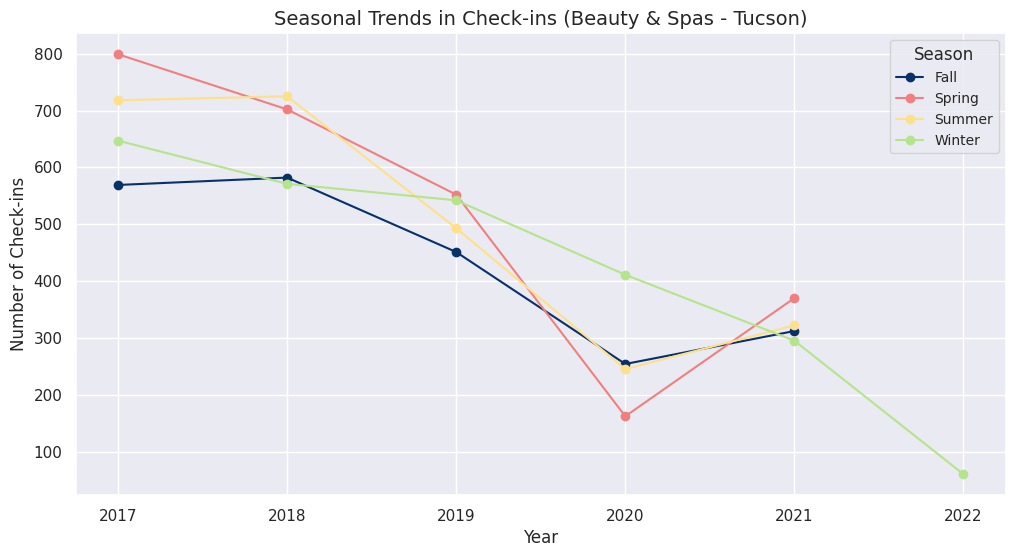

In [9]:
# Plot Seasonal Trends with Custom Colors
plt.figure(figsize=(10, 6))

# Pivot table for visualization
seasonal_pivot = seasonal_trends.pivot(index='year', columns='season', values='checkins')

# Define custom colors for each season
season_colors = ["#08306b", "#f08080", "#fee08b", "#b5e48c"]  # Dark blue, coral pink, light yellow, light green

# Plot Seasonal Trends with Custom Colors
plt.figure(figsize=(10, 6))
seasonal_pivot.plot(marker='o', linestyle='-', color=season_colors, figsize=(12, 6))

plt.title("Seasonal Trends in Check-ins (Beauty & Spas - Tucson)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Check-ins", fontsize=12)
plt.legend(title="Season", fontsize=10)
plt.grid(True)
plt.show()



####***Key Insights***

##### **Check-in trends vary across seasons**
- **2017-2019:** A steady decline across all seasons, suggesting either reduced demand in the industry or a shift in customer behavior.
- **2020:** Sharp drop across all seasons, especially in **spring**, likely due to pandemic lockdowns and social distancing measures.
- **2021 Partial Recovery, But 2022 Winter Decline:** While there was some recovery in **spring 2021**, check-ins dropped again in **winter 2022**, possibly indicating a seasonal low.

##### **Business Implications**
- **Spring was the most affected by COVID-19**, but it also saw some recovery in 2021, suggesting that businesses should focus on **spring promotions** to capitalize on returning customers.
- **Winter has the lowest check-in volume**, which may indicate a seasonal slowdown.
- **Businesses can:**
  - Introduce **winter-specific discounts** or **limited-time offers** to drive engagement.
  - Implement **membership programs** and **online booking incentives** to maintain customer interest during slow seasons.

#### ***Summary & Recommendations***
- The downward trend in check-ins suggests **shifting customer behavior**, requiring businesses to **adapt their strategies**.  
- **Seasonal insights** can guide businesses in **launching promotions** at peak demand periods and offering incentives during slower months.  
- While the pandemic had a major impact, **some industries started recovering in 2021**, presenting **opportunities for innovative strategies** to regain customers.

## K-Means Customer Segmentation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [11]:
# Aggregate customer-level features: total review count, average star rating, average review length, sentiment score
customer_features = reviews_df.groupby("user_id").agg({
    "review_id": "count",         # Total number of reviews per user
    "stars": "mean",              # Average star rating given by the user
    "review_length": "mean",      # Average number of words in reviews
    "sentiment_score": "mean"     # Average sentiment score of the reviews
}).reset_index()

# Rename columns for better readability
customer_features.rename(columns={"review_id": "review_count"}, inplace=True)

# Display the first few rows
print(customer_features.head())

                  user_id  review_count  stars  review_length  sentiment_score
0  --WEZqpZKkCVAe1AbCXT0w             4   4.75           54.5           0.9320
1  --boIvT3InggHeH9mdTDyg             1   5.00           22.0           0.9785
2  -0jJcs05h1ySi3GcmfoFYQ             1   3.00           45.0          -0.1910
3  -1kUNTybH69ZfzlamqWKig             1   5.00          126.0           0.9863
4  -28zKoHg2n8gU3RIPYEWjQ             1   5.00           34.0           0.0516


In [12]:
# Normalize data using StandardScaler to ensure all features have equal importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features.iloc[:, 1:])  # Exclude 'user_id'

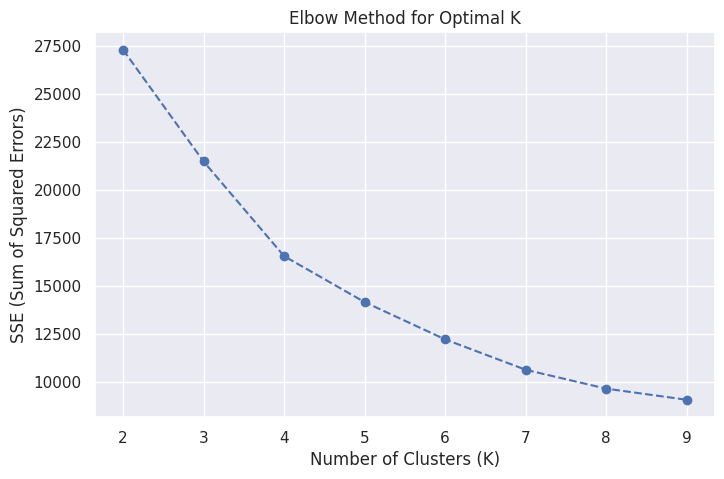

In [13]:
# Compute Sum of Squared Errors (SSE) for K values from 2 to 10
sse = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal K")
plt.show()


#### ***Analysis Overview***
This analysis is performing **customer segmentation using K-Means clustering** based on **Yelp user review data**.


##### **Step 1: Feature Aggregation**
- The dataset groups **customer-level features**, including:
  - **Total number of reviews per user** (`review_count`)
  - **Average star rating given by the user** (`stars`)
  - **Average review length (word count)** (`review_length`)
  - **Average sentiment score** (`sentiment_score`)

##### **Step 2: Interpreting the Elbow Method Plot**
- The **SSE curve shows a steep drop until around K=4 or K=5**, after which the decrease becomes more gradual.
- This suggests that **4 or 5 clusters might be an optimal choice** for segmenting customers.


##### ***Business Implications***
- This clustering can be used to categorize **Yelp users** into different segments, such as:
 - 1. **Highly Engaged Users** – Users who leave many reviews with detailed comments.
 - 2. **Casual Reviewers** – Users who leave fewer but generally neutral reviews.
 - 3. **Positive Advocates** – Users who frequently leave high-star, positive sentiment reviews.
 - 4. **Critical Users** – Users who leave mostly low-rated or negative sentiment reviews.

- Businesses can use this segmentation to **tailor marketing strategies**, such as:
 - Offering **loyalty rewards** to highly engaged users.
 - Encouraging **casual reviewers** to leave more feedback.
 - Addressing concerns raised by **critical users** to improve service.


In [14]:
# Apply K-Means clustering with K=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features["cluster"] = kmeans.fit_predict(X_scaled)
# Count the number of customers in each cluster
print(customer_features["cluster"].value_counts())

cluster
1    7313
2    2536
0     724
3     671
Name: count, dtype: int64


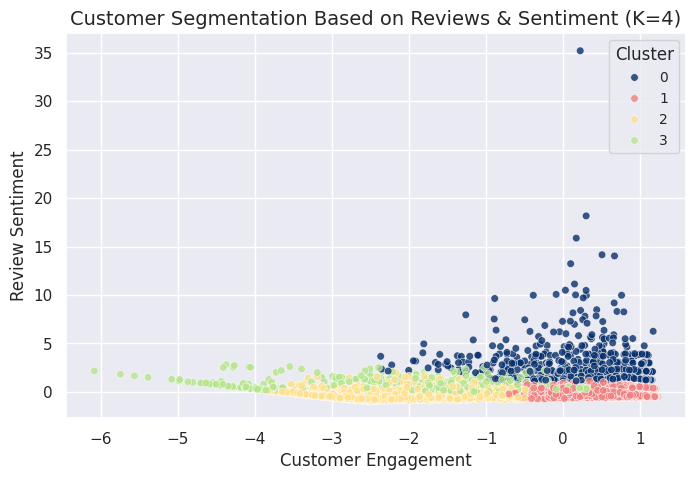

In [15]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["Customer Engagement", "Review Sentiment"])
pca_df["Cluster"] = customer_features["cluster"]

# Define a new color palette with **light yellow and light green**
palette = ["#08306b", "#f08080", "#fee08b", "#b5e48c"]  # Dark blue, blue, light yellow, light green

# Plot clusters with improved color distinction
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=pca_df,
    x="Customer Engagement",
    y="Review Sentiment",
    hue="Cluster",
    palette=palette,  # Use the new palette with light yellow and light green
    alpha=0.8,
    s=30
)
plt.title("Customer Segmentation Based on Reviews & Sentiment (K=4)", fontsize=14)
plt.xlabel("Customer Engagement", fontsize=12)
plt.ylabel("Review Sentiment", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.show()



### **Customer Segmentation Analysis (K=4)**

#### **Identified Customer Segments**
##### **Cluster 0 (Dark Blue - Highly Engaged, Mixed Sentiment)**
- Frequent reviewers with varying sentiment.
- Includes both brand advocates and critical customers.
- **Business Strategy:** Identify dissatisfied frequent reviewers and address their concerns.

##### **Cluster 1 (Medium Blue - Moderately Engaged, Mostly Positive Sentiment)**
- Occasional reviewers with slightly positive feedback.
- **Business Strategy:** Encourage them to engage more through loyalty incentives.

##### **Cluster 2 (Light Blue - Low Engagement, Negative Sentiment)**
- Rarely leaves reviews but tends to have negative sentiment.
- **Business Strategy:** Reach out with surveys or special offers to improve satisfaction.

##### **Cluster 3 (Darker Light Blue - Highly Engaged, Positive Sentiment)**
- Frequent reviewers who leave positive reviews.
- **Business Strategy:** Leverage them as brand advocates through referral programs.


## Final Conclusion
### Summary of Findings

#### 1. Trends Over Time:
- The number of **reviews** exhibited a generally stable trend from 2017 to 2019, followed by a **sharp decline in early 2020**, likely due to COVID-19 lockdowns.
- A partial **recovery** was observed in 2021, but review counts have not returned to pre-pandemic levels.
- The **average sentiment score** displayed fluctuations but showed an overall downward trend, suggesting increased customer dissatisfaction over time.

#### 2. Seasonal Check-in Patterns:
- **Check-in numbers declined gradually** between 2017 and 2019, indicating potential shifts in consumer behavior.
- A **sharp drop in early 2020** was consistent with the impact of pandemic-related restrictions.
- Although check-ins **rebounded in 2021**, they did not fully recover, suggesting a long-term shift in consumer engagement.
- Seasonal analysis revealed that **winter check-ins were consistently lower**, hinting at seasonal demand fluctuations.

#### 3. Customer Segmentation (K-Means Clustering):
- Based on **review count, star rating, review length, and sentiment score**, customers were segmented into four clusters:
  1. **Highly Engaged, Mixed Sentiment (Dark Blue)** – Frequent reviewers with varied feedback, including both advocates and critics.
  2. **Moderately Engaged, Mostly Positive (Medium Blue)** – Occasional reviewers with slightly positive sentiment.
  3. **Low Engagement, Negative Sentiment (Light Blue)** – Rare reviewers with mostly negative sentiment.
  4. **Highly Engaged, Positive Sentiment (Darker Light Blue)** – Frequent reviewers who leave mostly positive reviews.

### Business Implications & Recommendations

#### **1. Adapting to Long-Term Shifts in Consumer Behavior**
- The post-pandemic period has **not fully restored** previous levels of customer engagement.
- Businesses should **invest in digital transformation**, including online ordering, delivery services, and loyalty programs, to retain customers.

#### **2. Seasonal Promotions for Engagement**
- **Spring was the most impacted season** during the pandemic, but it showed recovery signs in 2021.
- **Winter check-ins were consistently lower**, suggesting an opportunity for **seasonal promotions** such as winter-specific discounts or special offers.

#### **3. Customer-Centric Strategies Based on Segmentation**
- **Highly engaged but mixed sentiment customers** require **proactive reputation management**, addressing negative feedback while maintaining strong relationships with brand advocates.
- **Casual reviewers** can be encouraged to leave more feedback through loyalty incentives.
- **Low engagement and negative sentiment customers** may benefit from **targeted outreach, surveys, and personalized offers** to improve satisfaction.
- **Highly engaged, positive reviewers** are **brand advocates** and should be leveraged through **referral programs and exclusive perks**.
